In [1]:
from pyMez import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 2.642 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.636 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 11.223 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.01 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.417 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.049 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 1.742 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.023 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.016 s to import Code.Utils.Names
It took 16.758 s to import all of the active modules


In [45]:
def plot_snp_model(frequency_model, **options):
    """Plots any table with frequency as its x-axis and column_names as the x-axis in a
    series of subplots"""
    defaults = {"display_legend": False,
                "save_plot": False,
                "directory": None,
                "specific_descriptor": "Frequency_Model",
                "general_descriptor": "Plot",
                "file_name": None,
                "plots_per_column": 2,
                "plot_format": 'b-',
                "share_x": False,
                "subplots_title": True,
                "plot_title": None,
                "plot_size": (8, 6),
                "dpi": 80,
                "format":"MA",
                "x_label":True,
                "grid":True}
    plot_options = {}
    for key, value in defaults.iteritems():
        plot_options[key] = value
    for key, value in options.iteritems():
        plot_options[key] = value
    
    
    current_format=frequency_model.format[:]
    if plot_options["format"]:
        if plot_options["format"] is current_format:
            pass
        elif re.search("R",plot_options["format"],re.IGNORECASE):
            frequency_model.change_data_format("RI")
        elif re.search("M",plot_options["format"],re.IGNORECASE):
            frequency_model.change_data_format("MA")
        elif re.search("D",plot_options["format"],re.IGNORECASE):
            frequency_model.change_data_format("DB")
    x_data = np.array(frequency_model["Frequency"])
    y_data_columns = frequency_model.column_names[:]
    y_data_columns.remove("Frequency")
    number_plots = len(y_data_columns)
    number_columns = plot_options["plots_per_column"]
    number_rows = int(round(float(number_plots) / float(number_columns)))
    figure, axes = plt.subplots(ncols=number_columns, nrows=number_rows, sharex=plot_options["share_x"],
                                figsize=plot_options["plot_size"], dpi=plot_options["dpi"])
    for plot_index, ax in enumerate(axes.flat):
        if plot_index < number_plots:
            y_data = np.array(frequency_model[y_data_columns[plot_index]])
            ax.plot(x_data, y_data, plot_options["plot_format"], label=y_data_columns[plot_index])
            if plot_options["display_legend"]:
                ax.legend()
            if plot_options["subplots_title"]:
                ax.set_title(y_data_columns[plot_index])
            if plot_options["x_label"]:
                ax.set_xlabel("Frequency ({0})".format(frequency_model.frequency_units))
            if plot_options["grid"]:
                ax.grid()
        else:
            pass
    
    if plot_options["plot_title"]:
        plt.suptitle(plot_options["plot_title"])
    frequency_model.change_data_format(current_format)
    plt.tight_layout()
    # Dealing with the save option
    if plot_options["file_name"] is None:
        file_name = auto_name(specific_descriptor=plot_options["specific_descriptor"],
                              general_descriptor=plot_options["general_descriptor"],
                              directory=plot_options["directory"], extension='png', padding=3)
    else:
        file_name = plot_options["file_name"]
    if plot_options["save_plot"]:
        # print file_name
        plt.savefig(os.path.join(plot_options["directory"], file_name))
    else:
        plt.show()
    return figure


In [8]:
s2p=S2PV1(r"C:\Share\WR15_Kits_VDI_20180223\Match_10015_P1_FixedLoad_70020_P2_WR15_20180223_001.s2p")
snp=SNP(r"C:\Share\WR15_Kits_VDI_20180223\Match_10015_P1_FixedLoad_70020_P2_WR15_20180223_001.s2p")

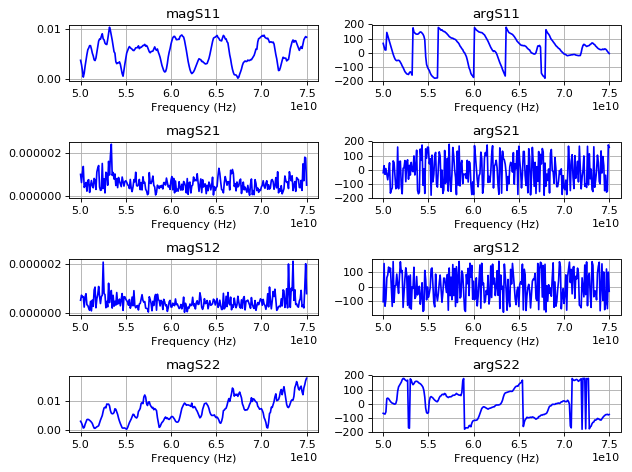

In [4]:
%matplotlib wx
s2p.show()

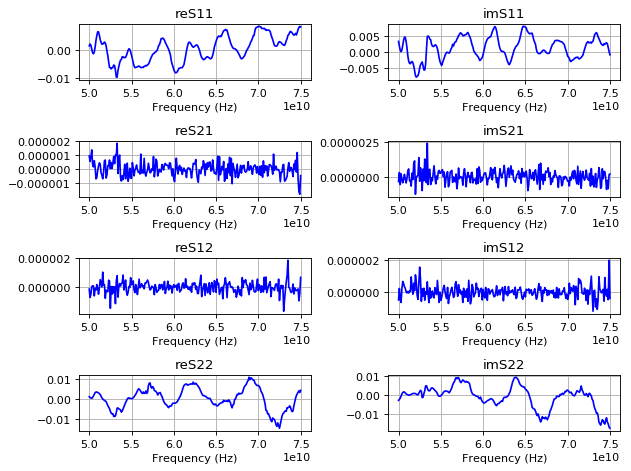

In [47]:
plot_snp_model(s2p,format="RI");

In [48]:
s2p.format[:]

'RI'

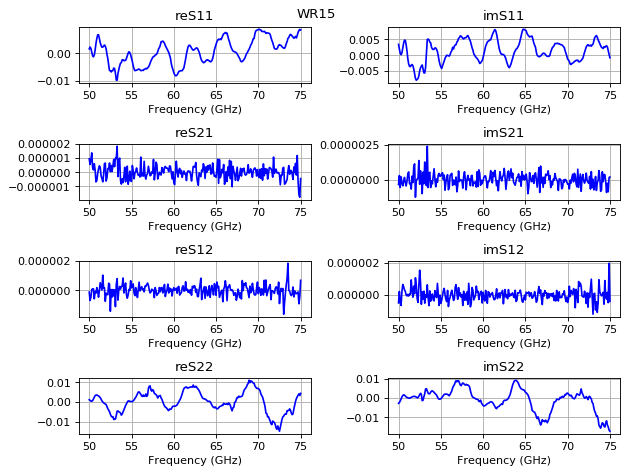

In [49]:
s2p.change_frequency_units("GHz")
plot_snp_model(s2p,format="R",plot_title="WR15");

In [35]:
s2p.frequency_units

'Hz'

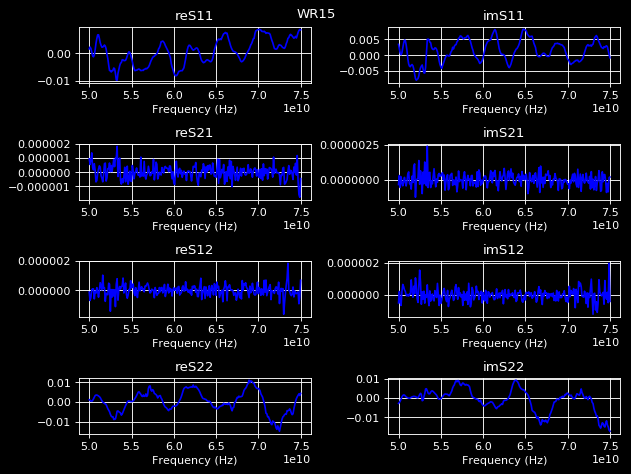

In [15]:
%matplotlib inline
with plt.style.context(('dark_background')):
    s2p.show(format="R",plot_title="WR15");

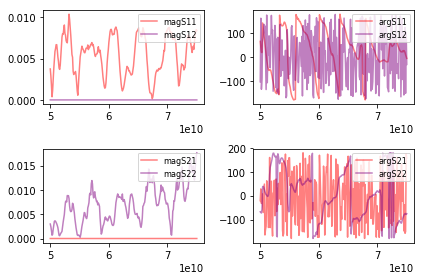

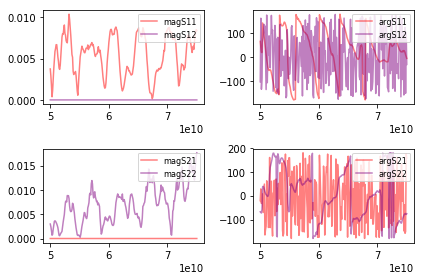

In [17]:
snp.show(format="RI")

In [18]:
from pyMez.Code.Analysis.Transformations import *

In [29]:
s1p=S2p_to_S1p(s2p)

{'specific_descriptor': 'Two_Port', 'option_line_line': 0, 'noiseparameter_begin_line': 251, 'sparameter_row_formatter_string': '{0:.4g}{delimiter}{1:.4g}{delimiter}{2:.4g}{delimiter}{3:.4g}{delimiter}{4:.4g}{delimiter}{5:.4g}{delimiter}{6:.4g}{delimiter}{7:.4g}{delimiter}{8:.4g}', 'directory': None, 'general_descriptor': 'Sparameter', 'sparameter_complex': [], 'path': None, 'noiseparameter_data': [], 'data': [], 'noiseparameter_end_line': 251, 'inline_comment_begin': '!', 'sparameter_end_line': 251, 'column_units': None, 'column_descriptions': None, 'extension': 's2p', 'column_names_delimiter': None, 'inline_comment_end': '', 'comments': [], 'data_delimiter': '  ', 'sparameter_begin_line': 1, 'nosieparameter_row_formatter_string': '{0:.4g}{delimiter}{1:.4g}{delimiter}{2:.4g}{delimiter}{3:.4g}{delimiter}{4:.4g}', 'option_line': '# GHz S RI R 50', 'metadata': None}


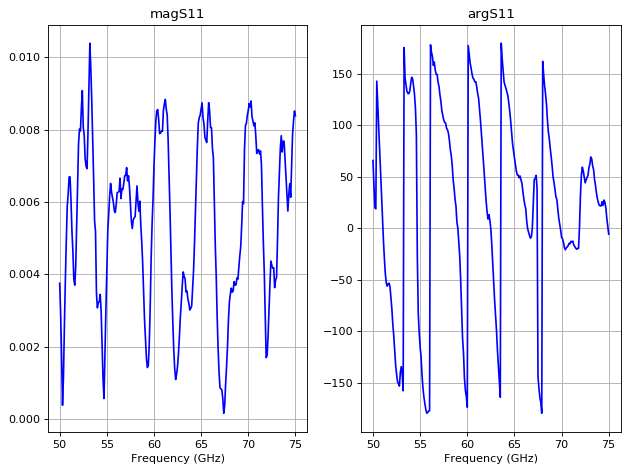

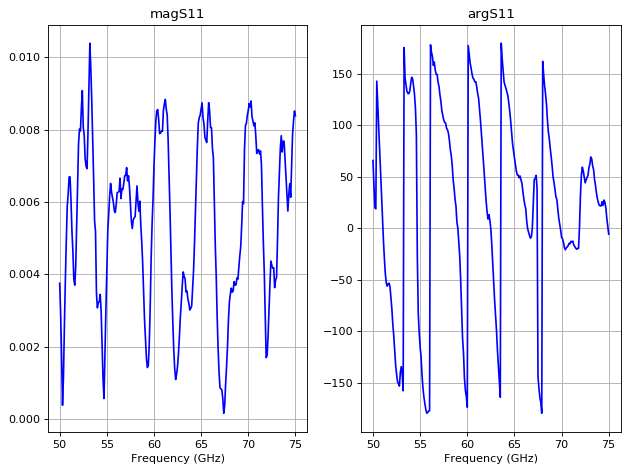

In [30]:
s1p.show()

In [21]:
s1p.frequency_units

'GGHz'

In [22]:
s2p.frequency_units

'GHz'

In [23]:
s2p.change_frequency_units("GHz")

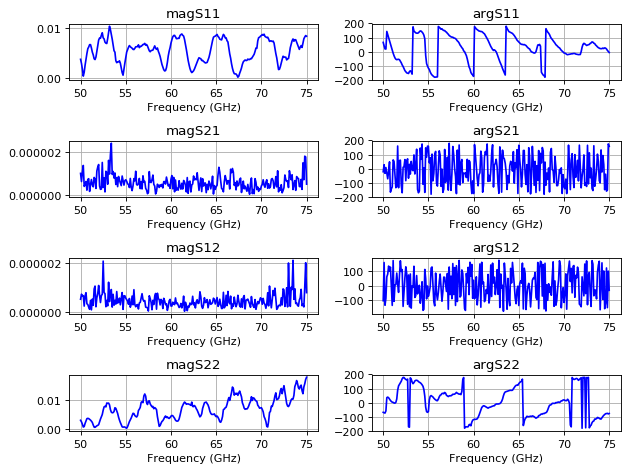

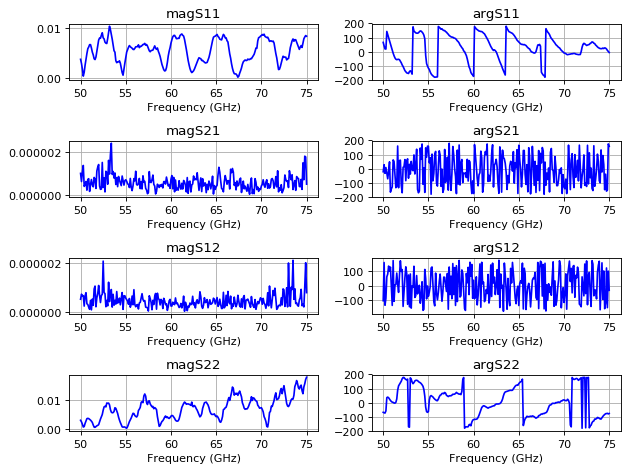

In [24]:
s2p.show()

In [25]:
s1p.change_frequency_units("GHz")

Could not change the unit prefix of column 0


KeyError: 'GG'

In [28]:
def S2p_to_S1p(s2p,column="S11"):
    """Creates an s1p from an s2p by taking column and frequency, column can be any value in ["S11","S21","S12","S22"]"""
    columns=["S11","S21","S12","S22"]
    s2p.change_data_format("RI")
    #s2p.change_frequency_units("GHz")
    index=columns.index(column)+1
    sparameter_complex=[]
    for row_index,row in enumerate(s2p.sparameter_complex[:]):
        sparameter_complex.append([row[0],row[index]])
    options=s2p.options.copy()
    print(options)
    options["column_names"]=["Frequency","reS11","imS11"]
    options["sparameter_complex"]=sparameter_complex
    options["number_ports"]=1
    s1p_out=S1PV1(None,**options)
    return s1p_out